NAME: NAVENITHA A/P JEGANATH (SW01082804)
NAME: JEYASREE SHANMUGAVELOO (SN01083033)

In [7]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 871.5 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00


In [9]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import nltk
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [11]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Load the dataset
df = pd.read_csv('news_dataset.csv')

# Keep only the 'text' column and remove nulls
df = df[['text']].dropna()

# Display the shape after cleaning
print("Dataset shape after removing null values:", df.shape)
df.head()


Dataset shape after removing null values: (11096, 1)


,text
0,I was wondering if anyone out there could enli...
1,I recently posted an article asking what kind ...
2,\nIt depends on your priorities. A lot of peo...
3,an excellent automatic can be found in the sub...
4,: Ford and his automobile. I need information...


In [15]:
# Define preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    # Apply stemming and lemmatization
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    return tokens

# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocess_text)

# Display processed data
df[['processed_text']].head()


,processed_text
0,"[wonder, anyon, could, enlighten, door, sport,..."
1,"[recent, post, articl, ask, kind, rate, singl,..."
2,"[depend, prioriti, peopl, higher, prioriti, mi..."
3,"[excel, automat, found, subaru, legaci, switch..."
4,"[ford, automobil, need, inform, whether, ford,..."


In [17]:
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

# Display a sample
print("Sample Bag of Words:", corpus[0])


Sample Bag of Words: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)]


In [26]:
# Train LDA model with 4 topics
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=4,
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Display topics
print("LDA Topics:")
pprint(lda_model.print_topics())


LDA Topics:
[(0,
  '0.024*"encrypt" + 0.017*"chip" + 0.012*"system" + 0.012*"use" + 0.011*"key" '
  '+ 0.010*"privaci" + 0.010*"clipper" + 0.010*"anonym" + 0.010*"inform" + '
  '0.010*"program"'),
 (1,
  '0.009*"year" + 0.007*"go" + 0.007*"like" + 0.007*"know" + 0.007*"would" + '
  '0.006*"time" + 0.005*"look" + 0.005*"think" + 0.005*"well" + 0.005*"back"'),
 (2,
  '0.005*"istanbul" + 0.003*"trinomi" + 0.003*"ermeni" + 0.003*"printf" + '
  '0.002*"ankara" + 0.002*"negev" + 0.002*"bayonet" + 0.002*"osmanli" + '
  '0.001*"onam" + 0.001*"scand"'),
 (3,
  '0.011*"peopl" + 0.010*"would" + 0.007*"govern" + 0.006*"secur" + '
  '0.005*"know" + 0.005*"right" + 0.005*"think" + 0.004*"state" + '
  '0.004*"public" + 0.004*"make"')]


In [28]:
# Evaluate LDA model
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=df['processed_text'],
                                     dictionary=dictionary,
                                     coherence='c_v')

coherence_score = coherence_model_lda.get_coherence()
print(f"\nCoherence Score: {coherence_score:.4f}")



Coherence Score: 0.4974


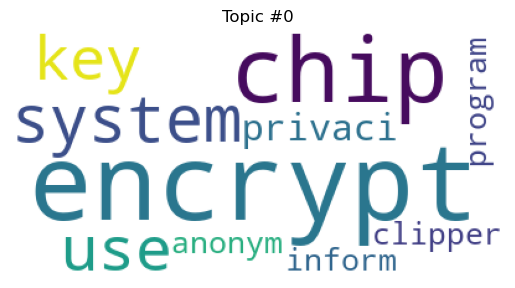

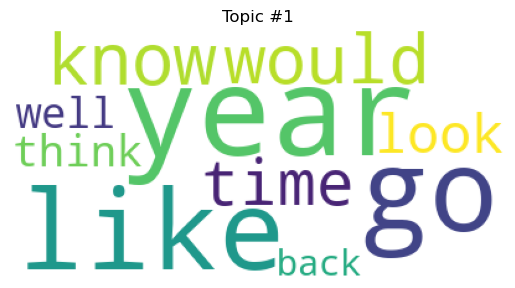

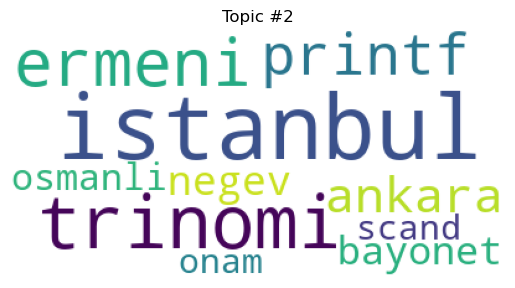

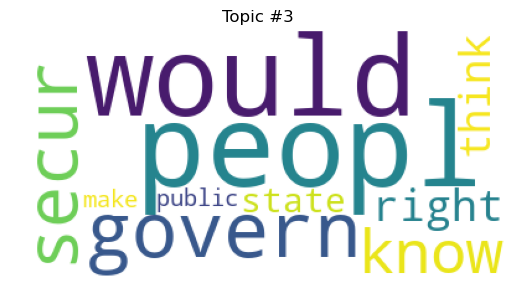

In [30]:
# Visualize topics using WordCloud
for i, topic in lda_model.show_topics(formatted=False, num_topics=4):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(topic)))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()


# Interpretation of Coherence Score 

Interpretation of the Coherence Score: The coherence score is a measure of how meaningful or semantically consistent the topics generated by the LDA model are. A higher coherence score (closer to 1) indicates that the words within each topic are more related, making the topics easier for humans to interpret. In this assignment, the coherence score helps evaluate how well the LDA model has grouped the unlabelled news articles into meaningful topics. If the score is low, adjustments to preprocessing, number of topics, or model parameters may be needed.



In [35]:
# Save topics to a text file
with open("lda_topics_output.txt", "w") as f:
    for idx, topic in lda_model.print_topics(-1):
        f.write(f"Topic {idx}: {topic}\n")
